# Reacher One Robotic Arm

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent

env = UnityEnvironment(file_name='environments/Reacher.app')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

action_size = brain.vector_action_space_size
state_size = brain.vector_observation_space_size

print(f"Action size: {action_size}")
print(f"State size: {state_size}")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Action size: 4
State size: 33


In [4]:
agent = Agent(state_size, action_size, random_seed=42)
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)

## Train Agent

In [5]:
def ddpg(n_episodes=5000, optimum_score=30.0):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations            # get the current state for each agent
        agent.reset()
        score = np.zeros(num_agents)
        #print(f"State: {state}")
        while True:
            action = agent.act(state)
            #print(f"Action: {action}")
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations   # get the next state
            #print(f"Next State: {next_state}")
            reward = env_info.rewards                   # get the reward
            #print(f"Reward: {reward}")
            done = env_info.local_done                  # see if episode has finished
            #print(f"Done: {done}")
            for i_agent in range(num_agents):
                agent.step(state[i_agent], action[i_agent], reward[i_agent], 
                           next_state[i_agent], done[i_agent])
            
            state = next_state
            score += reward
            
            if np.any(done):
                break
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= optimum_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')
            break
    return scores

In [6]:
scores = ddpg()

Episode 100	Average Score: 1.40
Episode 200	Average Score: 5.18
Episode 300	Average Score: 10.23
Episode 400	Average Score: 18.53
Episode 500	Average Score: 26.81
Episode 532	Average Score: 30.14
Environment solved in 432 episodes!	Average Score: 30.14


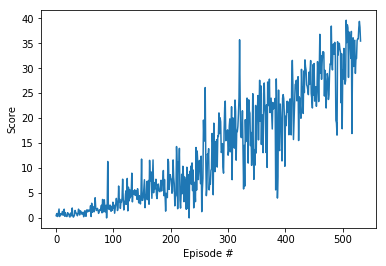

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Watch Trained Agent

In [ ]:
# load the weights from file
agent.actor_local.load_state_dict(torch.load('actor_checkpoint.pth', map_location={'cuda:0': 'cpu'}))
agent.critic_local.load_state_dict(torch.load('critic_checkpoint.pth', map_location={'cuda:0': 'cpu'}))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations            # get the current state
score = np.zeros(num_agents)                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations   # get the next state
    reward = env_info.rewards                   # get the reward
    done = env_info.local_done                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if np.any(done):
        break
    
print("Score: {}".format(score))

env.close()